In [4]:
import pm4py
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.statistics.traces.generic.log import case_statistics
import pandas as pd

In [ ]:
# Load CSV event log

df = pd.read_csv("../../data/Playground/KLINKDATEN_2022_converted_documentation.csv")
df = df[df["time:timestamp"].notna()]
df.sort_values(["sid", "time:timestamp"])
df['sid'] = df['sid'].astype(str)
df['rid'] = df['rid'].astype(str)
# Convert DataFrame to event log (ensuring proper column names)
event_log = pm4py.format_dataframe(
    df, 
    case_id="rid",  # Column representing case IDs
    activity_key="concept:name",  # Column representing activity names
    timestamp_key="time:timestamp"  # Column representing timestamps
)


/tmp/ipykernel_753929/3017058809.py:3: DtypeWarning: Columns (14,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/Playground/KLINKDATEN_2022_converted_documentation.csv")


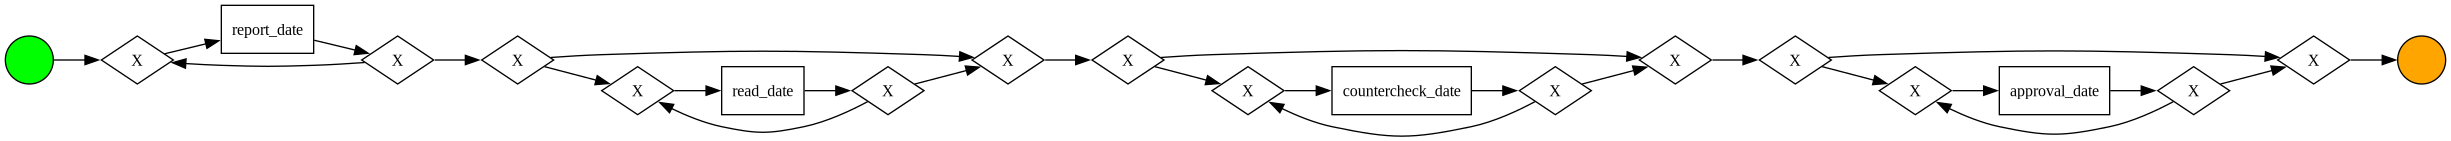

In [6]:
# Discover BPMN model from event log
bpmn_model= pm4py.discover_bpmn_inductive(event_log, noise_threshold=0.2)
dfg = pm4py.discover_directly_follows_graph(event_log)
# Visualize BPMN model
#pm4py.view_dfg(*dfg)
pm4py.view_bpmn(bpmn_model)

In [7]:
def get_cases_containing(filt_df, contains_str:str="mammo", column:str="concept:name", negate:bool=False):
    cases_including = filt_df.loc[filt_df[column].str.contains(contains_str, case=False, na=False), "case:concept:name"]
    if negate:
        return filt_df[~filt_df["case:concept:name"].isin(cases_including)]
    return filt_df[filt_df["case:concept:name"].isin(cases_including)]

def get_variants(var_df, group_by:str="rid"):
    variant_df = var_df[[group_by, "concept:name", "time:timestamp"]].groupby(group_by).agg({
    "concept:name": lambda x: " ".join(x)})
    return variant_df

## Clean Imports from EventLog -> must be fixed in data loader

In [8]:
df = get_cases_containing(df, contains_str="Import", column="area", negate=True)
df

,sid,concept:name,time:timestamp,pid,fid,area,abbr_name,name,device,team,...,referrer,comment,rid,zusaetze,sex,risks,age,org:resource,documentation_data,case:concept:name
0,7474214,report_date,2018-04-04 08:53:55+00:00,758641,-,NUK,NMCT,NM CT (Computertomografie),NMPETCT2,NaN,...,DYSF - Dysplasie Frauenklinik,ks nukl,10180685,NaN,W,NaN,38.0,MAET,NaN,10180685
1,7474214,read_date,2018-04-04 11:24:38+00:00,758641,-,NUK,NMCT,NM CT (Computertomografie),NMPETCT2,NaN,...,DYSF - Dysplasie Frauenklinik,ks nukl,10180685,NaN,W,NaN,38.0,MAET,NaN,10180685
2,7474214,countercheck_date,2018-04-04 11:42:52+00:00,758641,-,NUK,NMCT,NM CT (Computertomografie),NMPETCT2,NaN,...,DYSF - Dysplasie Frauenklinik,ks nukl,10180685,NaN,W,NaN,38.0,MAET,NaN,10180685
3,7474214,approval_date,2018-04-04 13:42:05+00:00,758641,-,NUK,NMCT,NM CT (Computertomografie),NMPETCT2,NaN,...,DYSF - Dysplasie Frauenklinik,ks nukl,10180685,NaN,W,NaN,38.0,MART,NaN,10180685
4,5817171,report_date,2021-01-18 13:42:35+00:00,1464805,0007809888,PETCT,NMPET0,NM PET Körperstamm F18-FDG (Hauptleistung),99,NaN,...,TEST Überweiser ohne Versand mp,NaN,12378445,NaN,M,KM-Allergie --- Klaustrophobie,32.0,FREPE,NaN,12378445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444956,7550869,read_date,2024-02-16 00:40:09+00:00,1868096,0009897208,AN,DYNACT,AN Dyna CT NRAD,NA3,NaN,...,MSUED - M SUED,NaN,14512495,NaN,M,Starke Platzangst!,85.0,PISA,NaN,14512495
1444957,7547266,read_date,2024-02-19 16:03:34+00:00,2255221,0009896389,AN,ACAR,AN Diagn. supraaortale Angiographie NRAD,NA3,NaN,...,020KOST - ASH K OST,NaN,14504256,NaN,M,NaN,49.0,KAJO,NaN,14504256
1444958,7547948,read_date,2024-02-19 16:03:34+00:00,2255221,0009896389,AN,3DDSA,AN 3D Rotationsangiografie NRAD,NA3,NaN,...,020KOST - ASH K OST,NaN,14504256,NaN,M,NaN,49.0,KAJO,NaN,14504256
1444959,7549402,approval_date,2024-02-26 09:05:00+00:00,377164,0009889081,CT,CTINFIL,CT Infiltration,CT4-NRAD,DIN,...,020KOST - ASH K OST,Gem. GRL können wir abrufen. schka,14508415,NaN,M,HWS Metal / MR Safety -->,80.0,EPIE,CT INFILTRATION VOM 10.01.2024\nCT WIRBELSÄULE...,14508415


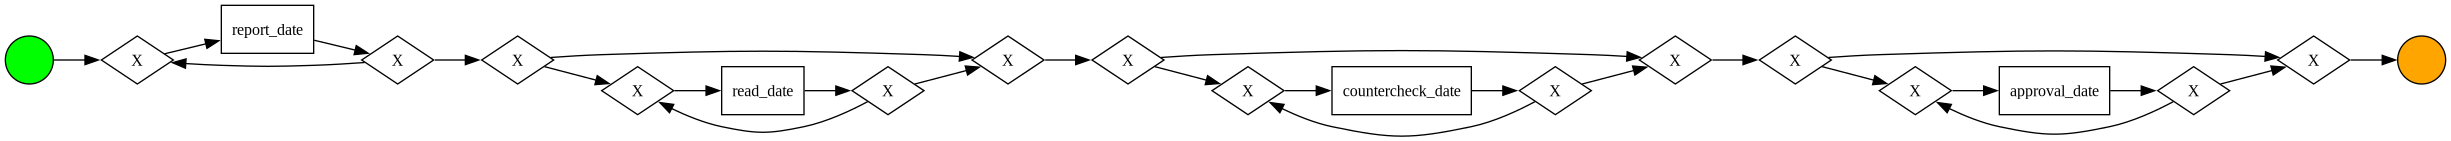

In [7]:
# Discover BPMN model from event log
bpmn_model= pm4py.discover_bpmn_inductive(df, noise_threshold=0.2)
dfg = pm4py.discover_directly_follows_graph(df)
# Visualize BPMN model
#pm4py.view_dfg(*dfg)
pm4py.view_bpmn(bpmn_model)

# Identify which resource does which task the most

In [8]:
# Analyse all resources connected with Mammo: 
docs = df.groupby(["org:resource", "concept:name"])["rid"].nunique().reset_index()
docs

,org:resource,concept:name,rid
0,AEBJA,report_date,1
1,AELO,approval_date,1
2,AELO,countercheck_date,206
3,AELO,read_date,1025
4,AELO,report_date,3141
...,...,...,...
1028,ZUEAR,read_date,3
1029,ZUEAR,report_date,58
1030,ZURI,countercheck_date,302
1031,ZURI,read_date,1571


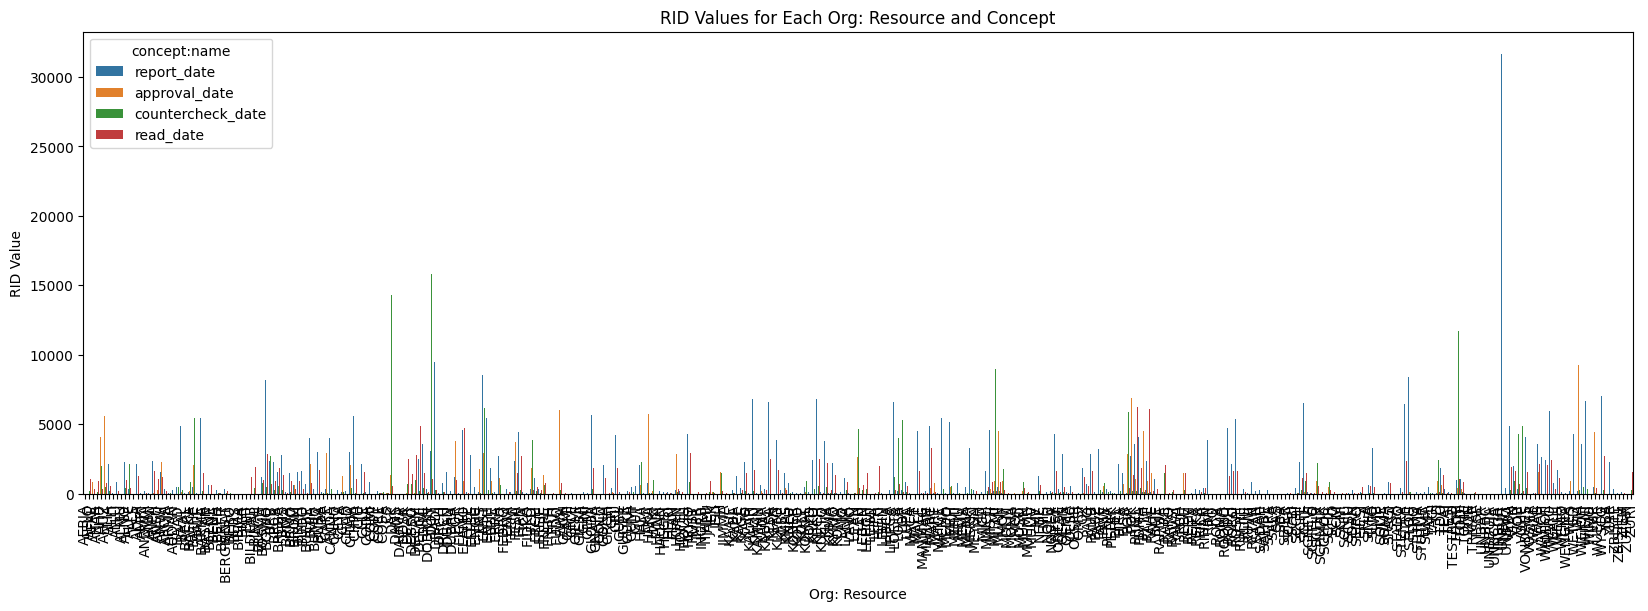

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a bar plot using Seaborn
plt.figure(figsize=(20, 6))
sns.barplot(x="org:resource", y="rid", hue="concept:name", data=docs)

# Add labels and title
plt.xlabel('Org: Resource')
plt.ylabel('RID Value')
plt.title('RID Values for Each Org: Resource and Concept')
plt.xticks(rotation=90)

# Display the plot
plt.show()

## Focus only on last Task in Process

In [10]:
max_indices = df.groupby("rid")["time:timestamp"].idxmax()
last_task_df = df[df.index.isin(max_indices)]

In [11]:
# Count Last tasks in process
last_task_df.groupby("concept:name")["concept:name"].count()

concept:name
approval_date        135921
countercheck_date    141715
read_date             62571
report_date          144601
Name: concept:name, dtype: int64

In [12]:
# Process instance len: 
rid_counts = df["rid"].value_counts()  # Count occurrences of each rid
rid_counts

rid
13176710    56
13460193    48
13320362    44
14107969    42
13886215    36
            ..
14144321     1
14144170     1
14144228     1
14144230     1
14144235     1
Name: count, Length: 484808, dtype: int64

In [13]:
# Resource on last task in Case: 
docs = last_task_df.groupby(["org:resource", "concept:name"])["rid"].nunique().reset_index()
docs

,org:resource,concept:name,rid
0,AELO,approval_date,1
1,AELO,countercheck_date,6
2,AELO,read_date,1
3,AELO,report_date,356
4,AFAL,approval_date,817
...,...,...,...
646,WYSCO,read_date,29
647,WYSCO,report_date,389
648,YIAR,report_date,15
649,ZBISTE,report_date,2


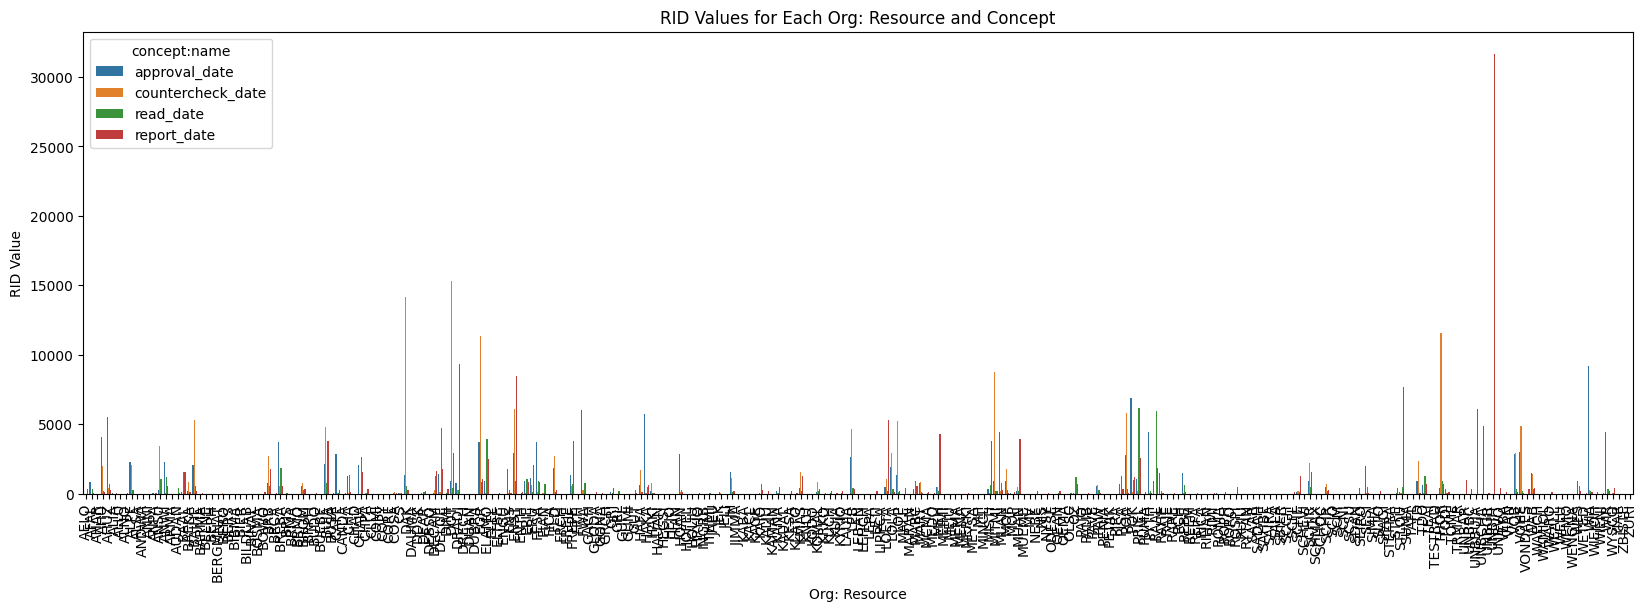

In [14]:
# Create a bar plot using Seaborn
plt.figure(figsize=(20, 6))
sns.barplot(x="org:resource", y="rid", hue="concept:name", data=docs)

# Add labels and title
plt.xlabel('Org: Resource')
plt.ylabel('RID Value')
plt.title('RID Values for Each Org: Resource and Concept')
plt.xticks(rotation=90)

# Display the plot
plt.show()

## Only Shortened EventLog created by Felix


In [15]:
# Load CSV event log

df = pd.read_csv("../data/Playground/Klinkdaten_FULL_documentation_rid.csv")
df = df[df["time:timestamp"].notna()]
df.sort_values(["rid", "time:timestamp"])
#df['sid'] = df['sid'].astype(str)
df['rid'] = df['rid'].astype(str)
# Convert DataFrame to event log (ensuring proper column names)
event_log = pm4py.format_dataframe(
    df, 
    case_id="rid",  # Column representing case IDs
    activity_key="concept:name",  # Column representing activity names
    timestamp_key="time:timestamp"  # Column representing timestamps
)


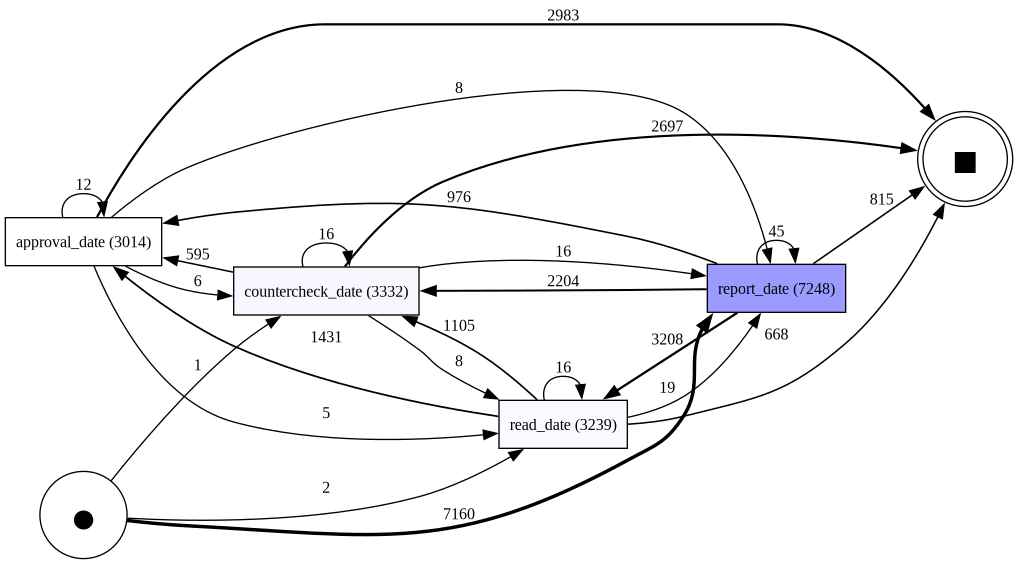

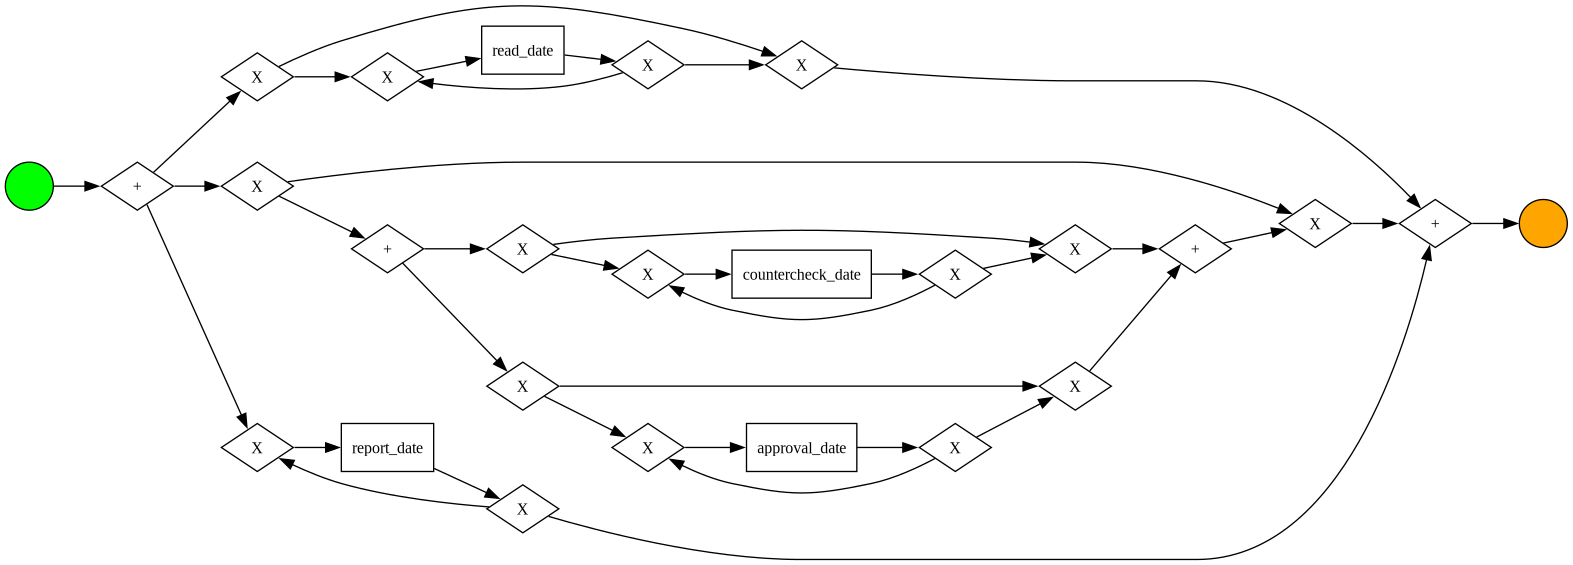

In [28]:
# Discover BPMN model from event log
bpmn_model= pm4py.discover_bpmn_inductive(event_log)
dfg = pm4py.discover_directly_follows_graph(event_log)
# Visualize BPMN model
pm4py.view_dfg(*dfg)
pm4py.view_bpmn(bpmn_model)

## Filter Log for top 8 variants

In [ ]:
# Get all variants and their frequency
variants_count = case_statistics.get_variant_statistics(event_log)

# Sort variants by occurrence
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)

# Print the top 5 variants
for variant in variants_count[:8]:
    print(f"Variant: {variant['variant']}, Count: {variant['count']}")

# Get the top N variants
top_n_variants = {v["variant"] for v in variants_count[:8]}  # Adjust '5' to your preferred N

# Apply filtering
filtered_log = variants_filter.apply(event_log, top_n_variants)

Variant: ('report_date', 'countercheck_date'), Count: 1924
Variant: ('report_date', 'read_date', 'approval_date'), Count: 1423
Variant: ('report_date', 'approval_date'), Count: 964
Variant: ('report_date',), Count: 768
Variant: ('report_date', 'read_date', 'countercheck_date'), Count: 757
Variant: ('report_date', 'read_date'), Count: 655
Variant: ('report_date', 'read_date', 'countercheck_date', 'approval_date'), Count: 330
Variant: ('report_date', 'countercheck_date', 'approval_date'), Count: 257


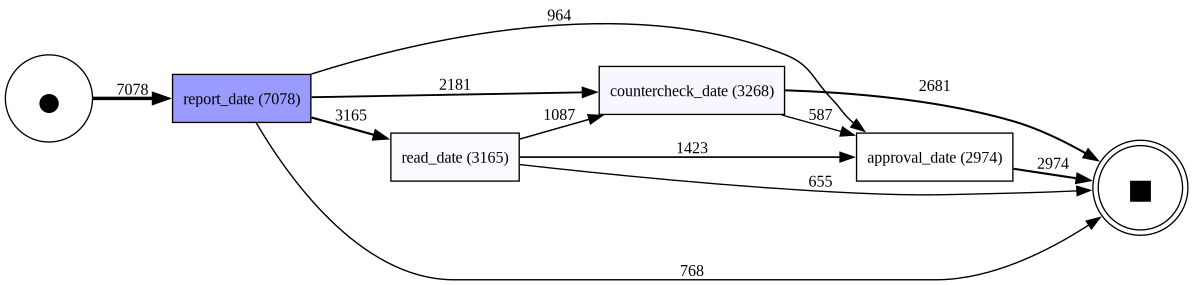

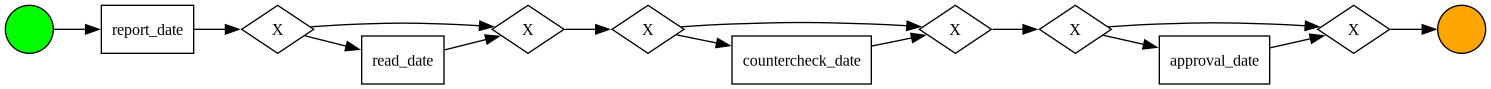

In [34]:
# Discover BPMN model from event log
bpmn_model= pm4py.discover_bpmn_inductive(filtered_log)
dfg = pm4py.discover_directly_follows_graph(filtered_log)
# Visualize BPMN model
pm4py.view_dfg(*dfg)
pm4py.view_bpmn(bpmn_model)

In [17]:
df

,rid,concept:name,time:timestamp,org:resource,pid,fid,case:concept:name
0,3422667,report_date,2010-05-17 18:56:01+00:00,MTR,97607,0003279017,3422667
1,5061810,report_date,2011-09-25 00:30:04+00:00,UNBEF,1065274,-,5061810
2,5735784,report_date,2013-03-26 18:28:38+00:00,NMA,1291967,0008095247,5735784
3,5735784,countercheck_date,2013-03-28 01:03:43+00:00,BOY,1291967,0008095247,5735784
4,7504223,report_date,2016-06-29 15:07:46+00:00,EPIE,1495761,0005474103,7504223
...,...,...,...,...,...,...,...
16828,7778238,countercheck_date,2016-12-08 17:37:33+00:00,VOHE,1527987,0005699460,7778238
16829,7778240,report_date,2016-12-08 12:44:18+00:00,VOLBE,328377,-,7778240
16830,7778240,read_date,2016-12-09 11:22:15+00:00,WAR,328377,-,7778240
16831,7778246,report_date,2016-12-08 12:46:35+00:00,MARC,294956,0005679177,7778246


In [18]:
# Analyse all resources connected with Mammo: 
docs = df.groupby(["org:resource", "concept:name"])["rid"].nunique().reset_index()
docs

,org:resource,concept:name,rid
0,AGJ,report_date,1
1,ALPE,countercheck_date,15
2,ALPE,read_date,20
3,ALPE,report_date,116
4,ALS,report_date,11
...,...,...,...
323,YABUE,read_date,12
324,YABUE,report_date,8
325,ZIFE,approval_date,48
326,ZIFE,read_date,20


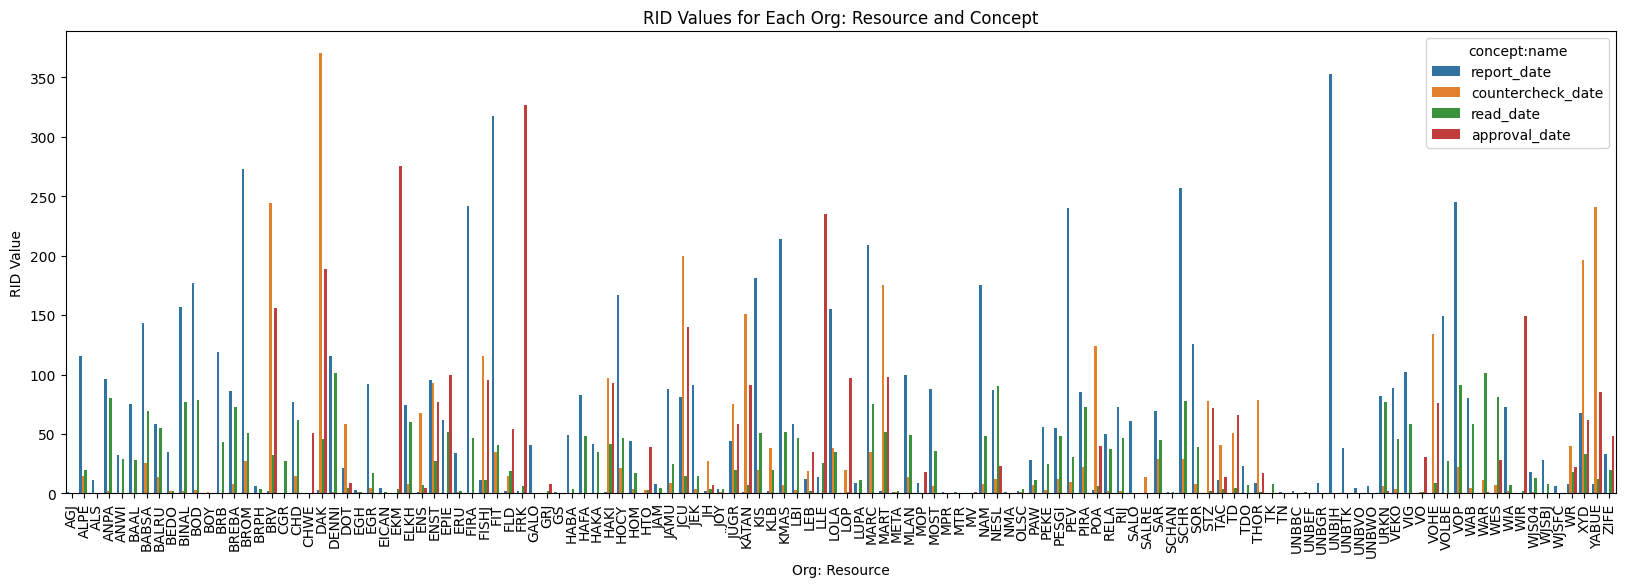

In [19]:
# Create a bar plot using Seaborn
plt.figure(figsize=(20, 6))
sns.barplot(x="org:resource", y="rid", hue="concept:name", data=docs)

# Add labels and title
plt.xlabel('Org: Resource')
plt.ylabel('RID Value')
plt.title('RID Values for Each Org: Resource and Concept')
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [20]:
# Only look at last task in a case
max_indices = df.groupby("rid")["time:timestamp"].idxmax()
last_task_df = df[df.index.isin(max_indices)]
# Resource on last task in Case: 
docs = last_task_df.groupby(["org:resource", "concept:name"])["rid"].nunique().reset_index()
docs

,org:resource,concept:name,rid
0,BOY,countercheck_date,1
1,BRV,approval_date,156
2,BRV,countercheck_date,244
3,BRV,read_date,31
4,BRV,report_date,1
...,...,...,...
144,YABUE,read_date,11
145,YABUE,report_date,8
146,ZIFE,approval_date,48
147,ZIFE,read_date,18


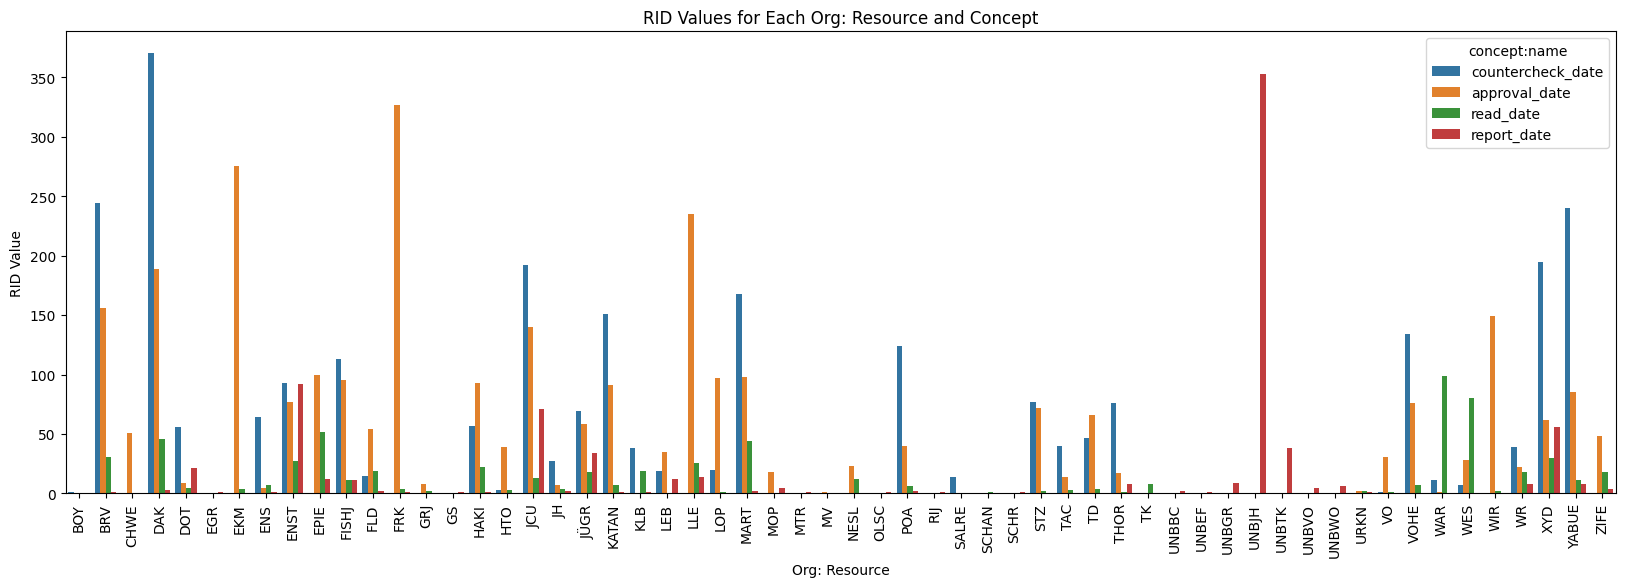

In [21]:
# Create a bar plot using Seaborn
plt.figure(figsize=(20, 6))
sns.barplot(x="org:resource", y="rid", hue="concept:name", data=docs)

# Add labels and title
plt.xlabel('Org: Resource')
plt.ylabel('RID Value')
plt.title('RID Values for Each Org: Resource and Concept')
plt.xticks(rotation=90)

# Display the plot
plt.show()

## Analytics of not last task

In [22]:
# Only look at last task in a case
max_indices = df.groupby("rid")["time:timestamp"].idxmax()
not_last_task_df = df[~df.index.isin(max_indices)]
# Resource on last task in Case: 
docs = not_last_task_df.groupby(["org:resource", "concept:name"])["rid"].nunique().reset_index()

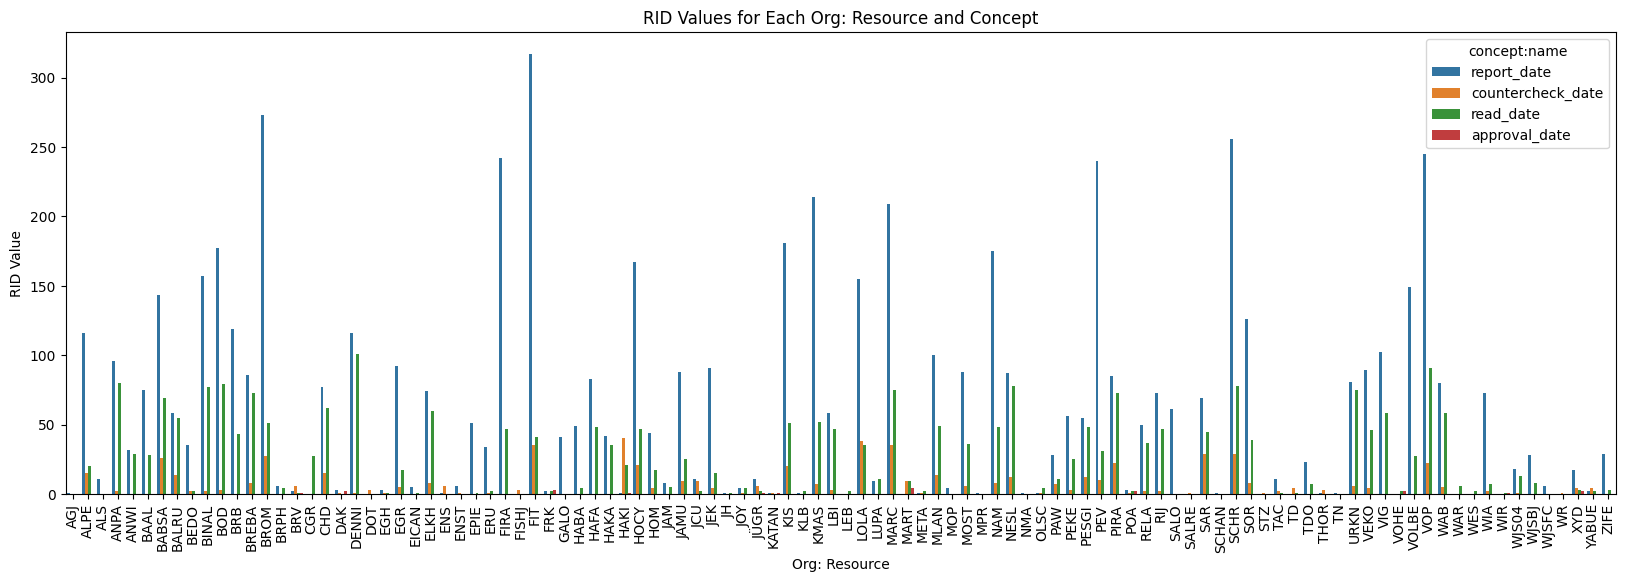

In [23]:
# Create a bar plot using Seaborn
plt.figure(figsize=(20, 6))
sns.barplot(x="org:resource", y="rid", hue="concept:name", data=docs)

# Add labels and title
plt.xlabel('Org: Resource')
plt.ylabel('RID Value')
plt.title('RID Values for Each Org: Resource and Concept')
plt.xticks(rotation=90)

# Display the plot
plt.show()

## Analysis of Resource focused process
- Is a resource mostly doing the same task or switches? 


In [26]:
# Group by 'RID' and aggregate the sequence as a tuple (order preserved)
grouped = df.groupby('rid')['concept:name'].apply(tuple).reset_index(name='combination')
grouped.groupby("combination").count().sort_values("rid", ascending=False)

,rid
combination,
"(report_date, countercheck_date)",1924
"(report_date, read_date, approval_date)",1423
"(report_date, approval_date)",964
"(report_date,)",768
"(report_date, read_date, countercheck_date)",757
"(report_date, read_date)",655
"(report_date, read_date, countercheck_date, approval_date)",330
"(report_date, countercheck_date, approval_date)",257
"(report_date, report_date)",26


In [46]:
id_df = grouped.groupby("combination").agg(list).sort_values(by="rid", key=lambda x: x.str.len(), ascending=False)[:8]

top_n_ids = []
for l in id_df["rid"].to_list():
    top_n_ids.extend(l)

In [50]:
id_df.reset_index()

,combination,rid
0,"(report_date, countercheck_date)","[5735784, 7751463, 7751464, 7751510, 7751518, ..."
1,"(report_date, read_date, approval_date)","[7751467, 7751484, 7751486, 7751487, 7751508, ..."
2,"(report_date, approval_date)","[7661243, 7751441, 7751687, 7751689, 7751711, ..."
3,"(report_date,)","[3422667, 5061810, 7741552, 7752883, 7753040, ..."
4,"(report_date, read_date, countercheck_date)","[7751465, 7751503, 7751612, 7751662, 7751681, ..."
5,"(report_date, read_date)","[7504223, 7751474, 7751618, 7751620, 7751626, ..."
6,"(report_date, read_date, countercheck_date, ap...","[7514063, 7751480, 7751597, 7751640, 7751846, ..."
7,"(report_date, countercheck_date, approval_date)","[7751622, 7751702, 7751806, 7751822, 7752146, ..."


### Analyse According to Yang2022 with Resource EventLog

Find the different execution contexts (co) for each resource. 
E.g.: 
- Res_1 executes Act1 in ProcVariant1 hands over to Act 3, CaseType = SU

Goal: 

| Resource | Task   | FollowTask | ProcVariant | Area |
|----------|--------|------------|-------------|------|
| EIPI     | report | read       | 5           | SE   |


In [76]:
variants_per_rid = id_df.reset_index().explode("rid").reset_index(names="variant").set_index("rid")
variant_df = df.join(variants_per_rid, how='left', on="rid")
variant_df

,rid,concept:name,time:timestamp,org:resource,pid,fid,case:concept:name,variant,combination
0,3422667,report_date,2010-05-17 18:56:01+00:00,MTR,97607,0003279017,3422667,3.0,"(report_date,)"
1,5061810,report_date,2011-09-25 00:30:04+00:00,UNBEF,1065274,-,5061810,3.0,"(report_date,)"
2,5735784,report_date,2013-03-26 18:28:38+00:00,NMA,1291967,0008095247,5735784,0.0,"(report_date, countercheck_date)"
3,5735784,countercheck_date,2013-03-28 01:03:43+00:00,BOY,1291967,0008095247,5735784,0.0,"(report_date, countercheck_date)"
4,7504223,report_date,2016-06-29 15:07:46+00:00,EPIE,1495761,0005474103,7504223,5.0,"(report_date, read_date)"
...,...,...,...,...,...,...,...,...,...
16828,7778238,countercheck_date,2016-12-08 17:37:33+00:00,VOHE,1527987,0005699460,7778238,4.0,"(report_date, read_date, countercheck_date)"
16829,7778240,report_date,2016-12-08 12:44:18+00:00,VOLBE,328377,-,7778240,5.0,"(report_date, read_date)"
16830,7778240,read_date,2016-12-09 11:22:15+00:00,WAR,328377,-,7778240,5.0,"(report_date, read_date)"
16831,7778246,report_date,2016-12-08 12:46:35+00:00,MARC,294956,0005679177,7778246,0.0,"(report_date, countercheck_date)"


In [ ]:
# From variant_df to Resource EventLog
variants_cleaned = variant_df[["org:resource", "rid", "concept:name", "variant", ]]
variants_cleaned = variants_cleaned.groupby(["org:resource", "concept:name", "variant"]).count().reset_index()
variants_cleaned["context"] = variants_cleaned["concept:name"] + variants_cleaned["variant"].astype(str)
variants_cleaned = variants_cleaned.drop(columns=["concept:name", "variant"])

,org:resource,rid,context
0,AGJ,1,report_date2.0
1,ALPE,4,countercheck_date6.0
2,ALPE,11,countercheck_date7.0
3,ALPE,8,read_date1.0
4,ALPE,8,read_date4.0
...,...,...,...
849,ZIFE,17,read_date5.0
850,ZIFE,2,report_date1.0
851,ZIFE,10,report_date2.0
852,ZIFE,4,report_date3.0


In [100]:
variants_pivot = variants_cleaned.pivot(index="org:resource", columns="context", values="rid")

## Try to cluster resources by GMM

In [115]:
from sklearn.mixture import GaussianMixture
import numpy as np

variants_cleaned_filled = variants_pivot.fillna(100.0)
X = variants_cleaned_filled.reset_index().drop(columns=["org:resource"])

gmm = GaussianMixture(n_components=20)  # 2 clusters as an example, adjust as needed
gmm.fit(X)


# Predict the cluster membership
variants_cleaned_filled['cluster'] = gmm.predict(X)
variants_cleaned_filled

context,approval_date1.0,approval_date2.0,approval_date6.0,approval_date7.0,countercheck_date0.0,countercheck_date4.0,countercheck_date6.0,countercheck_date7.0,read_date1.0,read_date4.0,...,read_date6.0,report_date0.0,report_date1.0,report_date2.0,report_date3.0,report_date4.0,report_date5.0,report_date6.0,report_date7.0,cluster
org:resource,,,,,,,,,,,,,,,,,,,,,
AGJ,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,1.0,100.0,100.0,100.0,100.0,100.0,3
ALPE,100.0,100.0,100.0,100.0,100.0,100.0,4.0,11.0,8.0,8.0,...,4.0,23.0,8.0,57.0,100.0,8.0,3.0,5.0,11.0,7
ALS,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,3.0,100.0,100.0,100.0,8.0,100.0,100.0,18
ANPA,100.0,100.0,100.0,100.0,100.0,100.0,2.0,100.0,79.0,100.0,...,1.0,100.0,79.0,12.0,100.0,100.0,3.0,2.0,100.0,8
ANWI,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,29.0,100.0,...,100.0,100.0,29.0,2.0,100.0,100.0,1.0,100.0,100.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WJSFC,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,5.0,1.0,100.0,100.0,6
WR,3.0,14.0,2.0,3.0,32.0,7.0,100.0,1.0,100.0,100.0,...,100.0,100.0,100.0,100.0,8.0,100.0,100.0,100.0,100.0,5
XYD,26.0,16.0,2.0,16.0,157.0,35.0,100.0,1.0,3.0,100.0,...,100.0,100.0,3.0,100.0,51.0,100.0,9.0,100.0,100.0,10


In [141]:
cluster_df = variants_cleaned_filled[["cluster"]]
res_df = cluster_df.reset_index().groupby("cluster").agg({', '.join})
res_df

context,org:resource
,join
cluster,
0,"BABSA, BREBA, ELKH, JAMU, LBI, MOST, PAW, PEKE..."
1,"EKM, FRK, LLE"
2,"ANWI, BRPH, EICAN, ERU, HABA, HAKA, TDO, WIA"
3,"AGJ, BOY, CGR, GS, MOP, MTR, MV, NMA, SALRE, U..."
4,"DOT, FISHJ, HAKI, MART, TD, THOR"
5,"FLD, JH, LEB, WR"
6,"BRB, HAFA, JAM, WJSFC"
7,"ALPE, BINAL, BOD, EGR, FIT, HOM, JOY, KIS, VOLBE"


In [146]:
clusters = variants_cleaned_filled.replace(100, np.nan).groupby("cluster").mean()
pd.concat([clusters, res_df], axis=1)

,approval_date1.0,approval_date2.0,approval_date6.0,approval_date7.0,countercheck_date0.0,countercheck_date4.0,countercheck_date6.0,countercheck_date7.0,read_date1.0,read_date4.0,...,read_date6.0,report_date0.0,report_date1.0,report_date2.0,report_date3.0,report_date4.0,report_date5.0,report_date6.0,report_date7.0,"(org:resource, join)"
cluster,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,6.384615,3.769231,40.153846,NaN,...,6.230769,NaN,40.615385,21.153846,NaN,NaN,5.000000,6.307692,3.769231,"BABSA, BREBA, ELKH, JAMU, LBI, MOST, PAW, PEKE..."
1,198.666667,50.666667,24.333333,4.333333,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,NaN,1.000000,NaN,14.000000,NaN,NaN,NaN,NaN,"EKM, FRK, LLE"
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.500000,11.125000,NaN,...,NaN,29.000000,11.125000,13.285714,NaN,NaN,9.800000,NaN,1.500000,"ANWI, BRPH, EICAN, ERU, HABA, HAKA, TDO, WIA"
3,6.000000,6.500000,NaN,NaN,7.0,NaN,NaN,NaN,27.000000,NaN,...,NaN,1.000000,NaN,2.500000,7.555556,NaN,NaN,NaN,NaN,"AGJ, BOY, CGR, GS, MOP, MTR, MV, NMA, SALRE, U..."
4,25.500000,21.400000,12.166667,6.666667,53.5,32.166667,7.666667,1.833333,8.666667,NaN,...,1.500000,NaN,NaN,1.000000,10.500000,NaN,NaN,NaN,NaN,"DOT, FISHJ, HAKI, MART, TD, THOR"
5,12.250000,9.333333,4.750000,7.333333,17.5,7.500000,NaN,1.000000,2.000000,NaN,...,NaN,NaN,NaN,NaN,5.750000,NaN,NaN,NaN,NaN,"FLD, JH, LEB, WR"
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,...,3.500000,49.000000,NaN,NaN,NaN,24.250000,3.000000,3.500000,NaN,"BRB, HAFA, JAM, WJSFC"
7,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,12.000000,14.714286,18.777778,...,6.555556,27.750000,14.625000,79.400000,NaN,18.333333,24.250000,6.777778,9.857143,"ALPE, BINAL, BOD, EGR, FIT, HOM, JOY, KIS, VOLBE"
8,NaN,NaN,NaN,NaN,NaN,NaN,3.777778,NaN,35.666667,45.000000,...,3.545455,106.500000,27.625000,7.000000,1.000000,45.000000,5.555556,4.000000,NaN,"ANPA, BALRU, DENNI, EGH, FIRA, META, OLSC, PES..."


## Old Backup

In [19]:
variant_df = df[["rid", "concept:name", "time:timestamp"]].groupby("rid").agg({
    "concept:name": lambda x: " ".join(x)})#,
    #"time:timestamp": lambda x: ", ".join(str(x))})
variant_df

,concept:name
rid,
10180685,report_date read_date countercheck_date approv...
12378445,report_date
12487564,report_date
13149296,report_date approval_date
13149301,report_date approval_date
...,...
14513157,report_date countercheck_date
14513162,report_date
14513163,report_date read_date countercheck_date approv...


In [20]:
variant_df = variant_df.groupby("concept:name").size().reset_index(name="count").sort_values(by="count", ascending=False)
variant_df

,concept:name,count
0,report_date,127084
7,report_date countercheck_date,81564
20,report_date read_date,49303
21,report_date read_date approval_date,44144
27,report_date read_date countercheck_date,37122
...,...,...
220,report_date report_date report_date report_dat...,1
222,report_date report_date report_date report_dat...,1
224,report_date report_date report_date report_dat...,1
209,report_date report_date report_date read_date ...,1


In [21]:
# Variants + Resources
df["org:resource"] = df["org:resource"].astype(str)
variant_df = df[["rid", "concept:name", "time:timestamp", "org:resource"]].groupby("rid").agg({
    "concept:name": lambda x: " ".join(x),
    "org:resource": lambda x: ", ".join(x)
    })
variant_df

,concept:name,org:resource
rid,,
10180685,report_date read_date countercheck_date approv...,"MAET, MAET, MAET, MART"
12378445,report_date,FREPE
12487564,report_date,HOLJU
13149296,report_date approval_date,"LUPA, ERU"
13149301,report_date approval_date,"LUPA, ERU"
...,...,...
14513157,report_date countercheck_date,"DEAR, SCHE"
14513162,report_date,CHAJA
14513163,report_date read_date countercheck_date approv...,"BOWO, BOWO, BOWO, MOF"


In [22]:
variant_df[variant_df["concept:name"] == "report_date"].groupby("org:resource").max()

,concept:name
org:resource,
AELO,report_date
AFAL,report_date
AHU,report_date
AHUZ,report_date
ALIA,report_date
...,...
WIA,report_date
WIEJOH,report_date
WIENI,report_date


In [23]:
len(set(df["org:resource"].to_list()))

386

In [24]:
# Online looking at mammographie use cases: 
mammo = get_cases_containing(df, contains_str="mammo", column="name")
mammo

,sid,concept:name,time:timestamp,pid,fid,area,abbr_name,name,device,team,...,comment,rid,zusaetze,sex,risks,age,org:resource,documentation_data,case:concept:name,start_timestamp
1346,6469460,report_date,2022-01-03 13:14:14+00:00,687984,0008334603,MA,MAMBDS,MA Mammografie beidseits,FKL1,DIPR_FRAU,...,Pat.Identifikation: GP\nSchwangerschaft: 0\n\n...,13151599,NaN,W,NaN,56.0,HRYJO,NaN,13151599,2022-01-03 13:14:14+00:00
1366,6469460,read_date,2022-01-03 13:20:17+00:00,687984,0008334603,MA,MAMBDS,MA Mammografie beidseits,FKL1,DIPR_FRAU,...,Pat.Identifikation: GP\nSchwangerschaft: 0\n\n...,13151599,NaN,W,NaN,56.0,HRYJO,NaN,13151599,2022-01-03 13:20:17+00:00
1618,6494860,report_date,2022-01-03 15:20:30+00:00,1316860,0008655571,MA,MAMBDS,MA Mammografie beidseits,FKL1,DIPR_FRAU,...,Pat.Identifikation: GP\nSchwangerschaft:0\n\nZ...,13151951,NaN,W,NaN,61.0,HRYJO,NaN,13151951,2022-01-03 15:20:30+00:00
1633,6494860,read_date,2022-01-03 15:25:37+00:00,1316860,0008655571,MA,MAMBDS,MA Mammografie beidseits,FKL1,DIPR_FRAU,...,Pat.Identifikation: GP\nSchwangerschaft:0\n\nZ...,13151951,NaN,W,NaN,61.0,HRYJO,NaN,13151951,2022-01-03 15:25:37+00:00
1721,6469460,countercheck_date,2022-01-03 16:13:56+00:00,687984,0008334603,MA,MAMBDS,MA Mammografie beidseits,FKL1,DIPR_FRAU,...,Pat.Identifikation: GP\nSchwangerschaft: 0\n\n...,13151599,NaN,W,NaN,56.0,VOB,NaN,13151599,2022-01-03 16:13:56+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444013,6958897,approval_date,2024-01-15 13:24:20+00:00,600732,0009103296,US,USMAM,US Sonografie Mamma,ABUS_TKH,DIPR_FRAU,...,NaN,14512665,NaN,W,NaN,55.0,VOB,MAMMOGRAFIE BEIDSEITS IN ZWEI EBENEN + sonogra...,14512665,2024-01-15 13:24:20+00:00
1444071,7548024,approval_date,2024-01-15 13:50:07+00:00,217950,0009896873,MA,MAMBDS,MA Mammografie beidseits,FKL1,DIPR_FRAU,...,Pat.Identifikation:LASA\nSchwangerschaft:0\n\n...,14512696,NaN,W,NaN,60.0,VOB,MAMMOGRAFIE BEIDSEITS IN ZWEI EBENEN VOM 15.01...,14512696,2024-01-15 13:50:07+00:00
1444164,7379925,report_date,2024-01-15 14:16:54+00:00,1572981,0009401518,MA,MAMBDS,MA Mammografie beidseits,FKL1,DIPR_FRAU,...,Pat.Identifikation:MUEBAB\nSchwangerschaft:0\n...,14513089,NaN,W,NaN,61.0,KALJU,NaN,14513089,2024-01-15 14:16:54+00:00
1444274,7379925,read_date,2024-01-15 14:53:39+00:00,1572981,0009401518,MA,MAMBDS,MA Mammografie beidseits,FKL1,DIPR_FRAU,...,Pat.Identifikation:MUEBAB\nSchwangerschaft:0\n...,14513089,NaN,W,NaN,61.0,WYSCO,MAMMOGRAFIE BEIDSEITS IN ZWEI EBENEN VOM 15.01...,14513089,2024-01-15 14:53:39+00:00


In [25]:
mammo["area"].unique()

array(['MA', 'US', 'MMAMMO', 'MADM', 'MSONO', 'RADM'], dtype=object)

In [26]:
checks = mammo.groupby(["area", "concept:name"])["rid"].nunique().reset_index()
checks

,area,concept:name,rid
0,MA,approval_date,4220
1,MA,countercheck_date,3857
2,MA,read_date,1772
3,MA,report_date,4669
4,MADM,report_date,11
5,MMAMMO,approval_date,462
6,MMAMMO,countercheck_date,56
7,MMAMMO,read_date,290
8,MMAMMO,report_date,642
9,MSONO,approval_date,133


In [27]:
checks = df.groupby(["area", "concept:name"])["rid"].nunique().reset_index()
checks

,area,concept:name,rid
0,AADM,approval_date,2
1,AADM,countercheck_date,2
2,AADM,read_date,7
3,AADM,report_date,540
4,ACT,approval_date,1051
...,...,...,...
181,VI,read_date,853
182,VI,report_date,2760
183,XTEST,countercheck_date,2
184,XTEST,read_date,3


In [28]:
pivot_df = checks.pivot_table(index='area', columns='concept:name', values='rid', aggfunc='sum', fill_value=0)
column_order = ["report_date", "read_date", "countercheck_date", "approval_date"]
pivot_df = pivot_df[column_order].sort_values("report_date", ascending=False)
pivot_df

concept:name,report_date,read_date,countercheck_date,approval_date
area,,,,
CT,78371,53246,49158,37376
MR,72226,50765,20018,47764
SK,70965,16207,50193,5407
US,45878,11822,17736,7771
DV,45466,13159,9935,7592
TH,37474,9522,29296,3194
TROE,18312,5392,928,1011
AROE,18089,7647,191,1184
PETCT,11962,6395,2544,10313


In [29]:
pivot_df["read_perc"] = (pivot_df["read_date"] / pivot_df["report_date"]).round(2)
pivot_df["counter_perc"] = (pivot_df["countercheck_date"] / pivot_df["report_date"]).round(2)
pivot_df["appr_perc"] = (pivot_df["approval_date"] / pivot_df["report_date"]).round(2)
pivot_df.sort_values("appr_perc", ascending=False)


concept:name,report_date,read_date,countercheck_date,approval_date,read_perc,counter_perc,appr_perc
area,,,,,,,
MA,4762,1829,3913,4267,0.38,0.82,0.90
APPLI,663,320,251,584,0.48,0.38,0.88
PETCT,11962,6395,2544,10313,0.53,0.21,0.86
NUK,6439,2438,1465,4843,0.38,0.23,0.75
MMAMMO,642,290,56,462,0.45,0.09,0.72
SD,1424,464,132,995,0.33,0.09,0.70
MR,72226,50765,20018,47764,0.70,0.28,0.66
TSONO,3673,1562,646,1914,0.43,0.18,0.52
ASONO,4609,2652,279,2320,0.58,0.06,0.50


In [30]:
pivot_df.sort_values("counter_perc", ascending=False)


concept:name,report_date,read_date,countercheck_date,approval_date,read_perc,counter_perc,appr_perc
area,,,,,,,
MA,4762,1829,3913,4267,0.38,0.82,0.90
TH,37474,9522,29296,3194,0.25,0.78,0.09
SK,70965,16207,50193,5407,0.23,0.71,0.08
CT,78371,53246,49158,37376,0.68,0.63,0.48
TR,2283,1238,1407,886,0.54,0.62,0.39
VI,2760,853,1677,515,0.31,0.61,0.19
AR,334,255,196,153,0.76,0.59,0.46
UR,426,122,230,85,0.29,0.54,0.20
XTEST,4,3,2,0,0.75,0.50,0.00


In [31]:
pivot_df.sort_values("read_perc", ascending=False)

concept:name,report_date,read_date,countercheck_date,approval_date,read_perc,counter_perc,appr_perc
area,,,,,,,
THERAPIE,888,781,18,148,0.88,0.02,0.17
AR,334,255,196,153,0.76,0.59,0.46
XTEST,4,3,2,0,0.75,0.50,0.00
MR,72226,50765,20018,47764,0.70,0.28,0.66
CT,78371,53246,49158,37376,0.68,0.63,0.48
TDL,376,221,103,100,0.59,0.27,0.27
ASONO,4609,2652,279,2320,0.58,0.06,0.50
AMR,6821,3846,748,704,0.56,0.11,0.10
ADL,1218,675,27,42,0.55,0.02,0.03


## Mammo Deep Dive:

In [32]:
# Mammo Deep Dive: 
ma = get_cases_containing(df, contains_str="MA", column="area")
checks = ma.groupby(["area", "concept:name", "name"])["rid"].nunique().reset_index()
checks = checks[checks["area"] == "MA"]

In [33]:
pivot_df = checks.pivot_table(index='name', columns='concept:name', values='rid', aggfunc='sum', fill_value=0)
column_order = ["report_date", "read_date", "countercheck_date", "approval_date"]
pivot_df = pivot_df[column_order].sort_values("report_date", ascending=False)
pivot_df

concept:name,report_date,read_date,countercheck_date,approval_date
name,,,,
MA Mammografie beidseits,3965,1510,3341,3670
MA Mammografie rechts,280,117,228,247
MA Mammografie links,215,74,182,202
MA Aufnahme Exzisionspräparat Mamma,198,111,125,105
MA Stereotaktische Mammotome rechts,100,39,56,48
MA Stereotaktische Mammotome links,78,29,33,35
MA Stereotaxische Mammamarkierung links,36,22,22,23
MA Stereotaxische Mammamarkierung rechts,35,18,21,17
MA Mammografie,19,4,17,17


In [34]:
pivot_df["read_perc"] = (pivot_df["read_date"] / pivot_df["report_date"]).round(2)
pivot_df["counter_perc"] = (pivot_df["countercheck_date"] / pivot_df["report_date"]).round(2)
pivot_df["appr_perc"] = (pivot_df["approval_date"] / pivot_df["report_date"]).round(2)
pivot_df.sort_values("appr_perc", ascending=False)

concept:name,report_date,read_date,countercheck_date,approval_date,read_perc,counter_perc,appr_perc
name,,,,,,,
MA Mammografie links,215,74,182,202,0.34,0.85,0.94
MA Mammografie beidseits,3965,1510,3341,3670,0.38,0.84,0.93
MA Mammografie,19,4,17,17,0.21,0.89,0.89
MA Mammografie rechts,280,117,228,247,0.42,0.81,0.88
MA Stereotaxische Mammamarkierung links,36,22,22,23,0.61,0.61,0.64
MA Aufnahme Exzisionspräparat Mamma,198,111,125,105,0.56,0.63,0.53
MA Stereotaxische Mammamarkierung,4,4,1,2,1.00,0.25,0.50
MA Stereotaxische Mammamarkierung rechts,35,18,21,17,0.51,0.60,0.49
MA Stereotaktische Mammotome rechts,100,39,56,48,0.39,0.56,0.48


In [35]:
pivot_df.sort_values("counter_perc", ascending=False)

concept:name,report_date,read_date,countercheck_date,approval_date,read_perc,counter_perc,appr_perc
name,,,,,,,
MA Mammografie,19,4,17,17,0.21,0.89,0.89
MA Mammografie links,215,74,182,202,0.34,0.85,0.94
MA Mammografie beidseits,3965,1510,3341,3670,0.38,0.84,0.93
MA Mammografie rechts,280,117,228,247,0.42,0.81,0.88
MA Aufnahme Exzisionspräparat Mamma,198,111,125,105,0.56,0.63,0.53
MA Stereotaxische Mammamarkierung links,36,22,22,23,0.61,0.61,0.64
MA Stereotaxische Mammamarkierung rechts,35,18,21,17,0.51,0.60,0.49
MA Stereotaktische Mammotome rechts,100,39,56,48,0.39,0.56,0.48
MA Stereotaktische Mammotome links,78,29,33,35,0.37,0.42,0.45


In [36]:
# Analyse all resources connected with Mammo: 
ma = ma[ma["area"] == "MA"]
ma = get_cases_containing(ma, contains_str="approval_date", column="concept:name",  negate=True)
docs = ma.groupby(["org:resource", "concept:name"])["rid"].nunique().reset_index()
docs


,org:resource,concept:name,rid
0,AHU,countercheck_date,1
1,AHU,read_date,1
2,ALNO,report_date,1
3,ALSA,report_date,1
4,BARMA,read_date,4
...,...,...,...
64,VOB,report_date,19
65,WIENI,read_date,4
66,WIENI,report_date,22
67,WYSCO,read_date,8


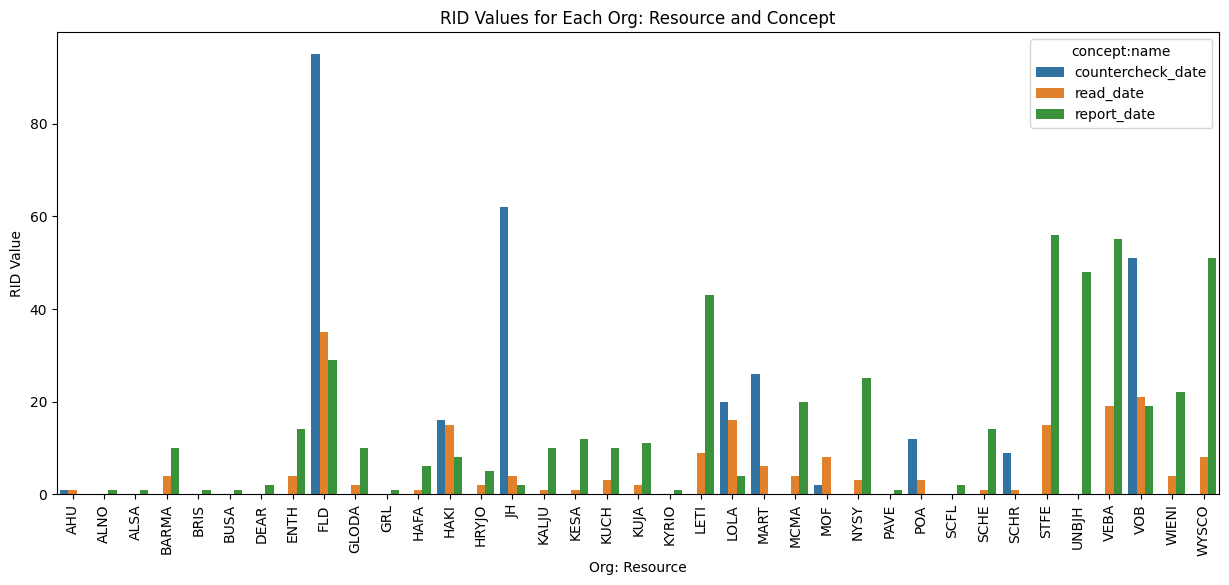

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a bar plot using Seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x="org:resource", y="rid", hue="concept:name", data=docs)

# Add labels and title
plt.xlabel('Org: Resource')
plt.ylabel('RID Value')
plt.title('RID Values for Each Org: Resource and Concept')
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [38]:
new_docs = get_cases_containing(docs, contains_str="approval_date", negate=True)


KeyError: 'case:concept:name'

In [ ]:
# Create a bar plot using Seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x="org:resource", y="rid", hue="concept:name", data=new_docs)

# Add labels and title
plt.xlabel('Org: Resource')
plt.ylabel('RID Value')
plt.title('RID Values for Each Org: Resource and Concept')
plt.xticks(rotation=90)

# Display the plot
plt.show()